Problem Statement:
The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.


In [1]:
import numpy as np 
import pandas as pd 
import warnings

import matplotlib.pyplot as plt 
import seaborn as sns


sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
trn = pd.read_csv("train_b.csv")
trn.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
trn['index']=trn.index

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


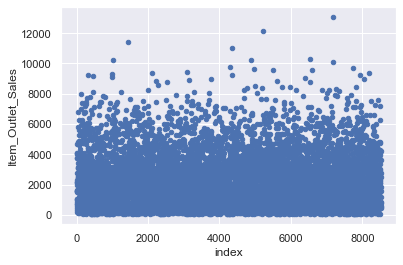

In [4]:
trn.plot(kind='scatter',x='index',y='Item_Outlet_Sales')

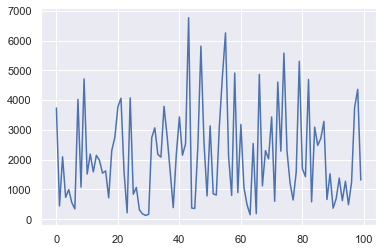

In [5]:
plt.plot(trn['index'][0:100],trn['Item_Outlet_Sales'][0:100])
plt.show()

In [6]:
trn=trn.drop(['index'],axis=1)

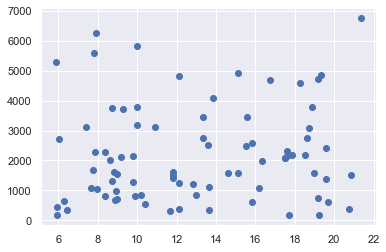

In [7]:
plt.scatter(trn['Item_Weight'][0:100],trn['Item_Outlet_Sales'][0:100])
plt.show()

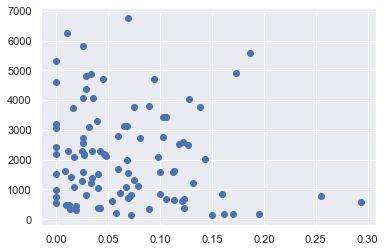

In [8]:
plt.scatter(trn['Item_Visibility'][0:100],trn['Item_Outlet_Sales'][0:100])
plt.show()

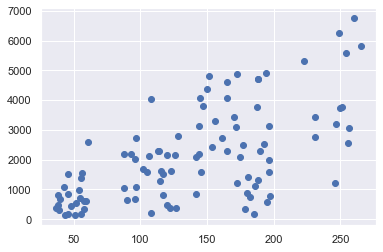

In [9]:
plt.scatter(trn['Item_MRP'][0:100],trn['Item_Outlet_Sales'][0:100])
plt.show()

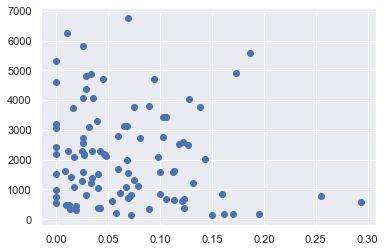

In [10]:
plt.scatter(trn['Item_Visibility'][0:100],trn['Item_Outlet_Sales'][0:100])
plt.show()

In [11]:
trn.shape

(8523, 12)

In [12]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
trn.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
print("Train:\n")
print(trn.isnull().sum())

Train:

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [15]:
print("Outlet_Size:\n", trn.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", trn.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64 




In [16]:

trn['Outlet_Size'] = trn['Outlet_Size'].fillna(trn['Outlet_Size'].dropna().mode().values[0])

trn['Outlet_Size'].isnull().sum()

0

Text(0.5, 1.0, 'Item_Weight Boxplot')

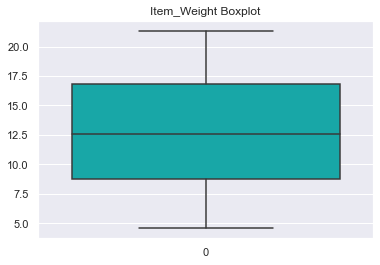

In [17]:
sns.boxplot(data=trn['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

In [18]:
trn['Item_Weight'] = trn['Item_Weight'].fillna(trn['Item_Weight'].dropna().mean())


trn['Item_Weight'].isnull().sum()

0

In [19]:
print("train:\n")
print(trn.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [20]:
trn.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [21]:
trn['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)


trn.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
trn.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:

trn['Outlet_Age']= trn['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)


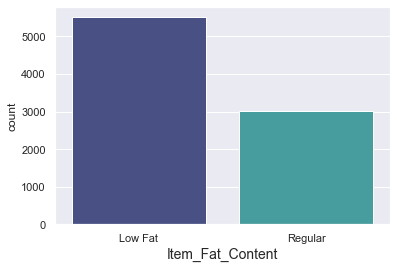

In [24]:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=trn ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

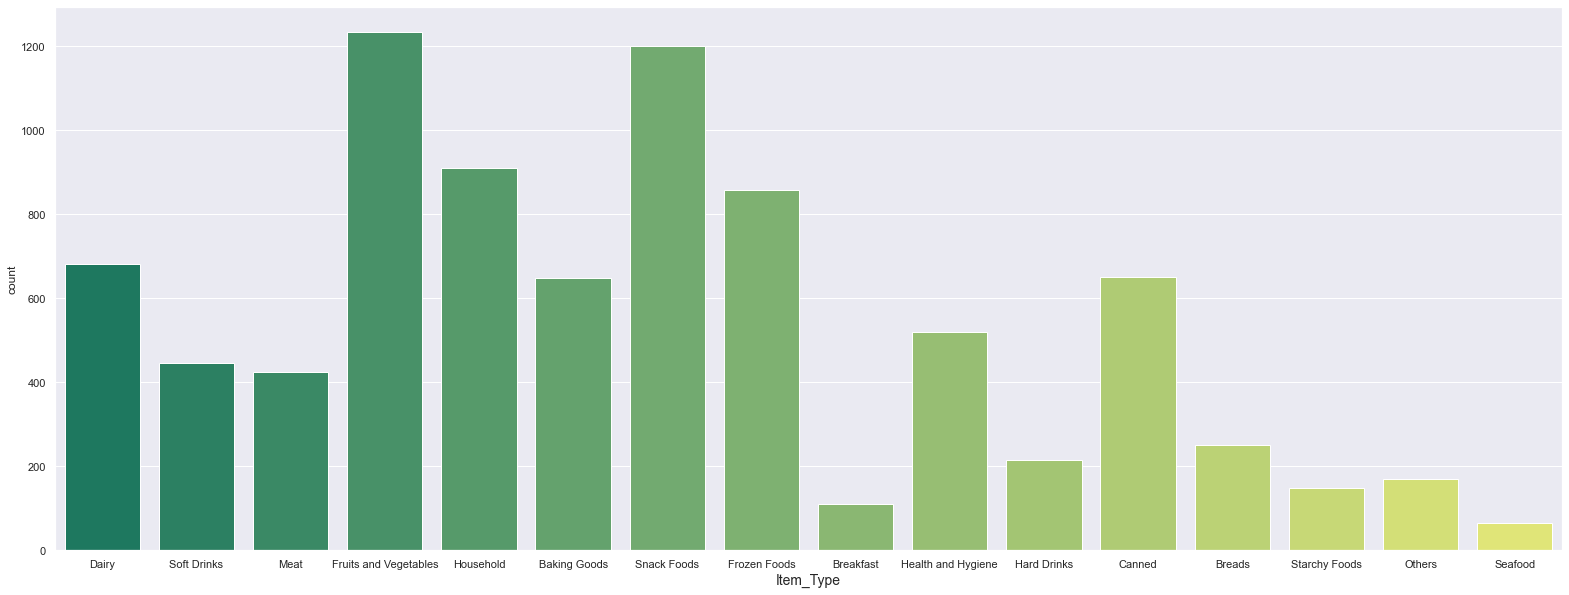

In [25]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=trn ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

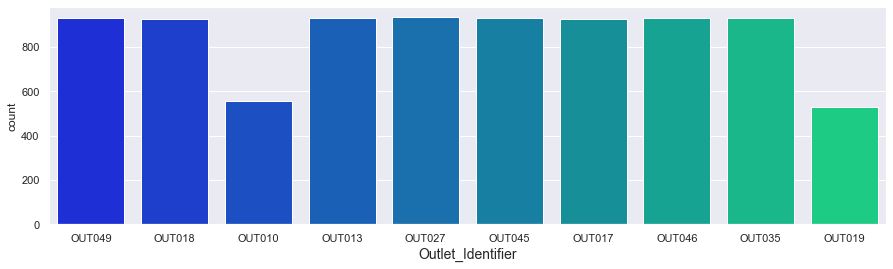

In [26]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=trn ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

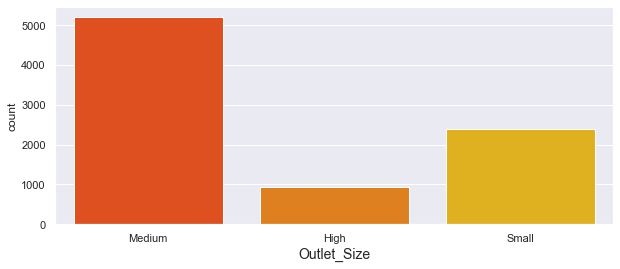

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=trn ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

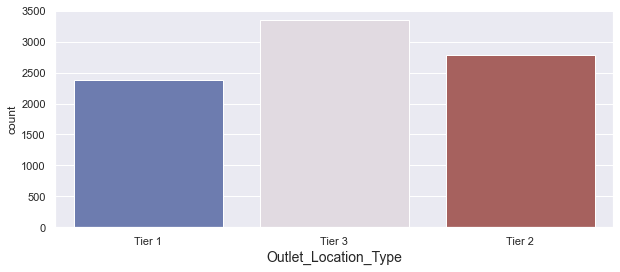

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=trn ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

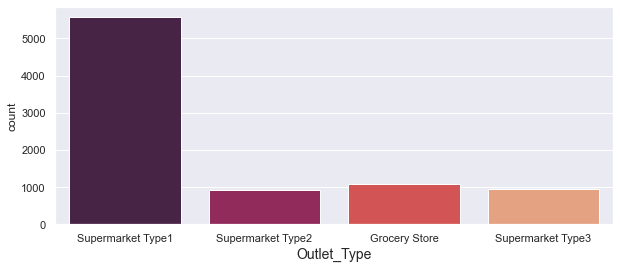

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=trn ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

No handles with labels found to put in legend.


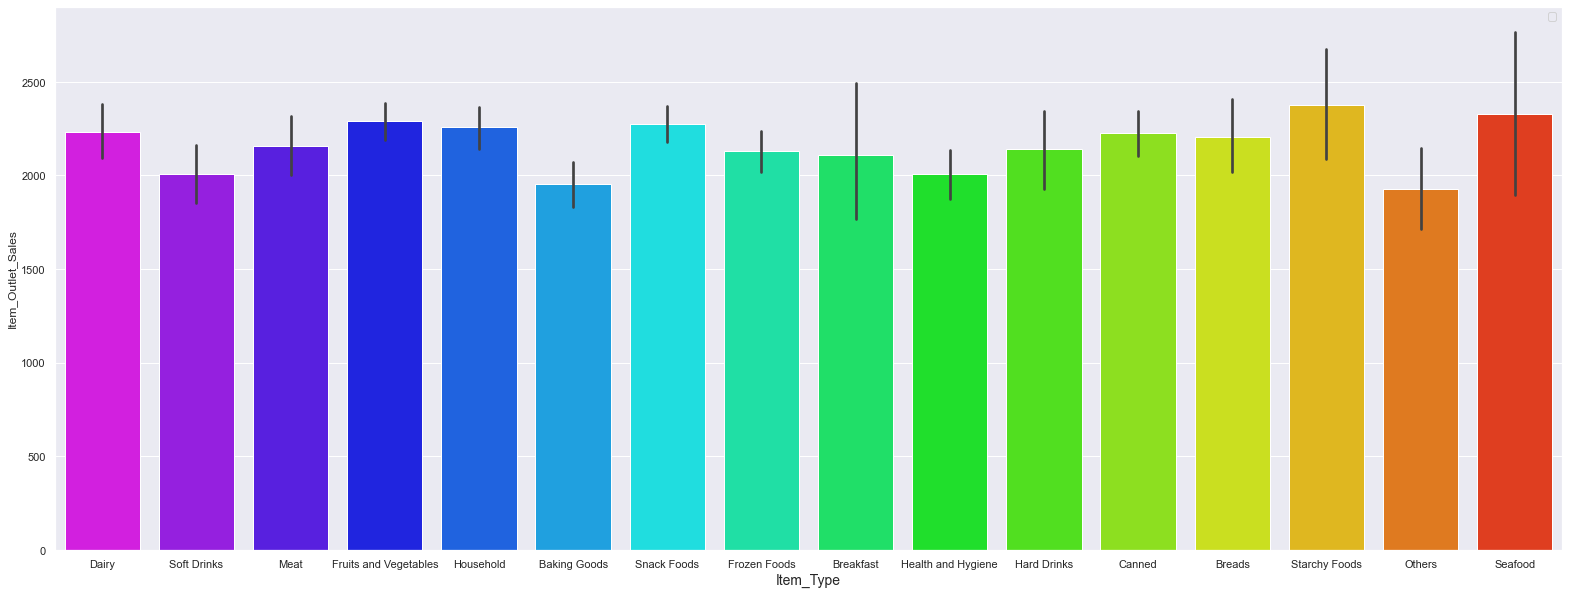

In [30]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=trn ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


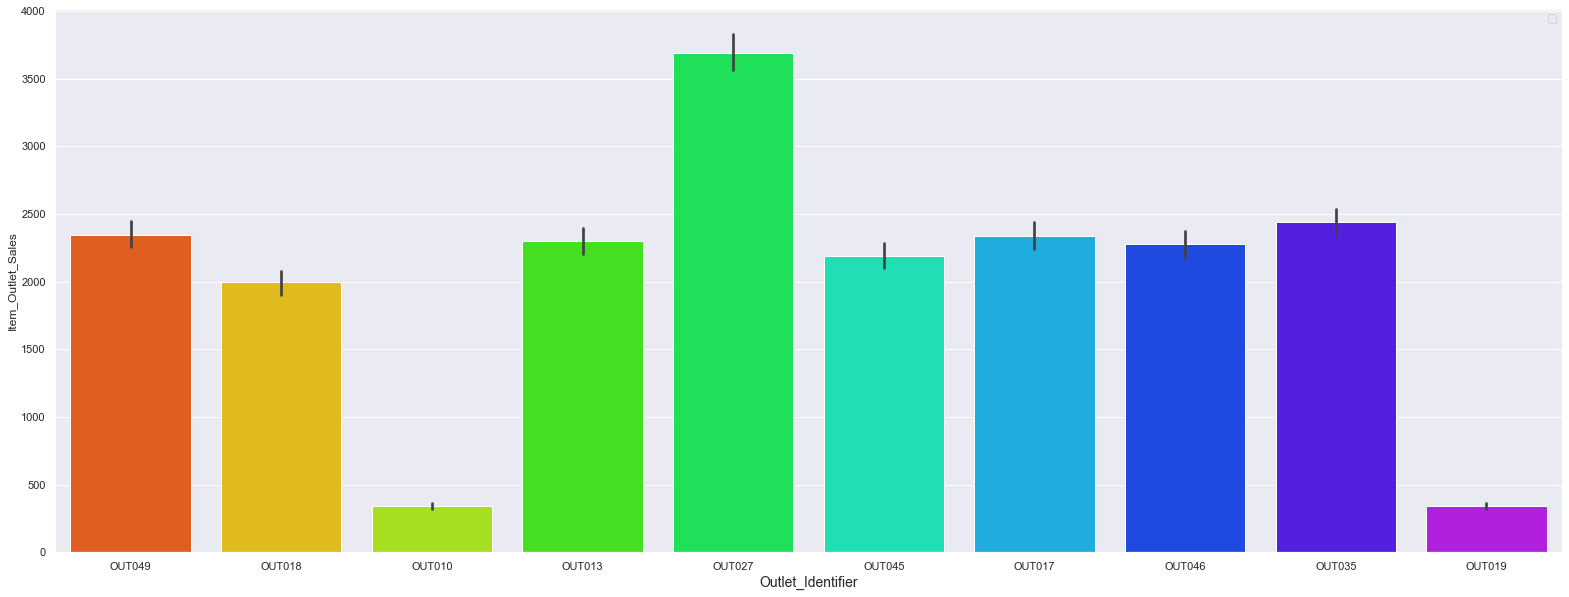

In [31]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=trn ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


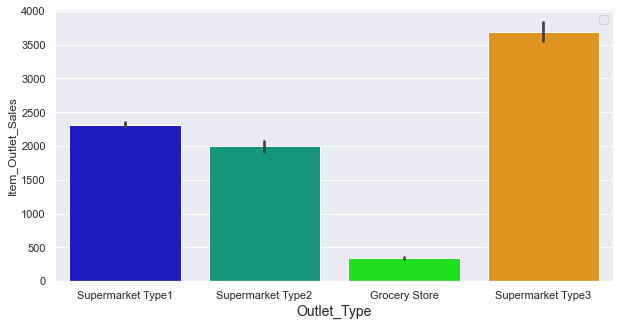

In [32]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=trn ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


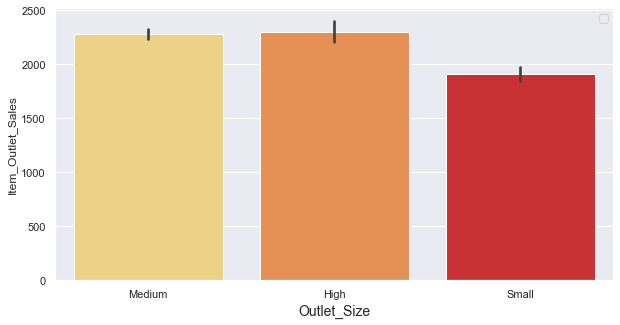

In [33]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=trn ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


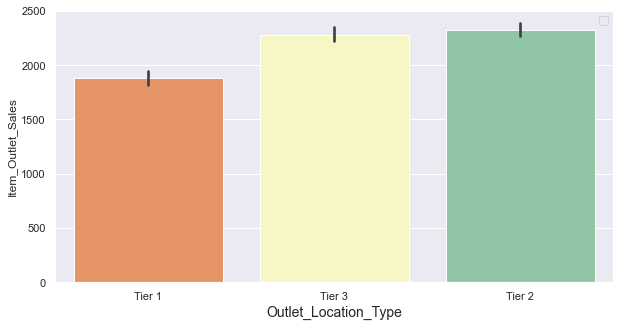

In [34]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=trn ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

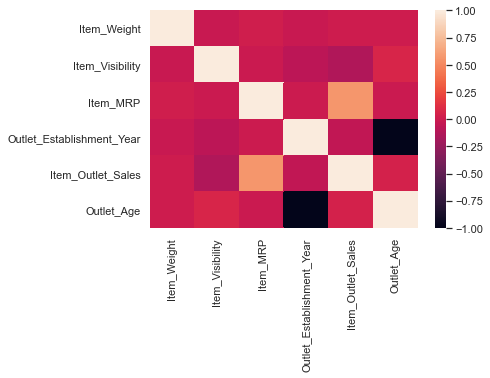

In [35]:
#plotting the correlation matrix
sns.heatmap(trn.corr() ,cmap='rocket')

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    trn[i] = le.fit_transform(trn[i])
    
trn.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [37]:
cols = ['Item_Type','Outlet_Type']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(trn[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = trn.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
tr_fe = pd.concat([trn, tr_oh], axis=1)

In [38]:

tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
#te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [39]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [44]:
clmn=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']
features=X_train[clmn]
scaler=sc.fit(features.values)
features=scaler.transform(features.values)
X_train[clmn]=features

In [45]:
clmn=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']
features=X_test[clmn]
scaler=sc.fit(features.values)
features=scaler.transform(features.values)
X_test[clmn]=features

In [46]:
print(y_train)

1010     692.4320
7430    1749.7224
7503    1743.0644
3632    1102.5648
6965    1877.5560
          ...    
1372    2269.0464
919      451.4124
4307    1246.3776
5699    4660.6000
537     2187.1530
Name: Item_Outlet_Sales, Length: 6818, dtype: float64


In [47]:
print(y.shape)
print(X.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8523,)
(8523, 27)
(6818, 27)
(6818,)
(1705, 27)
(1705,)


In [48]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
6449,0.564214,0,0.513123,0.288454,1,1,-0.496740,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5635,0.023807,0,-0.772381,0.062564,1,2,1.523182,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5966,1.190813,0,-0.881030,-0.716738,1,2,-0.021464,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2644,0.925713,0,-1.238012,-1.367755,1,1,-1.090834,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6325,-1.526457,0,0.478300,0.554577,2,0,0.097355,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
X_test.dtypes

Item_Weight                        float64
Item_Fat_Content                     int32
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Size                          int32
Outlet_Location_Type                 int32
Outlet_Age                         float64
Item_Type_Baking Goods               int64
Item_Type_Breads                     int64
Item_Type_Breakfast                  int64
Item_Type_Canned                     int64
Item_Type_Dairy                      int64
Item_Type_Frozen Foods               int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Hard Drinks                int64
Item_Type_Health and Hygiene         int64
Item_Type_Household                  int64
Item_Type_Meat                       int64
Item_Type_Others                     int64
Item_Type_Seafood                    int64
Item_Type_Snack Foods                int64
Item_Type_Soft Drinks                int64
Item_Type_Starchy Foods              int64
Outlet_Type

In [50]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression


In [52]:
LR = LinearRegression()

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)



In [53]:
print(y_predict,y_test)

[2587.15625 3773.40625 -368.34375 ... 3678.65625 -978.84375 1235.15625] 6449    2535.3664
5635    3661.9000
5966      96.5410
2644     884.1824
6325    2988.1104
          ...    
7585      49.9350
6567    1596.5884
7578    5937.6044
5374      47.9376
4875    2220.4430
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [54]:
#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")

 Mean Absolute Error: 867.09

 Mean Squared Error: 1411588.39

 R^2 Score: 0.5437



In [55]:
scores = CVS(LinearRegression(), X, y, cv=5)
print('Scores:')
for i in scores:
    print(round(i,2))
print(f'Average score: {round(scores.mean(),4)}')

Scores:
0.57
0.55
0.55
0.56
0.56
Average score: 0.558


In [56]:
from sklearn import metrics
accuracy_lr=LR.score(X_test,y_test)

In [57]:
print(accuracy_lr*100)

54.36550134665077


Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=57)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

accuracy_rfr=RFR.score(X_test,y_test)


In [60]:
#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")


 Mean Absolute Error: 794.41

 Mean Squared Error: 1314101.03

 R^2 Score: 0.5752



In [61]:
scores = CVS(RandomForestRegressor(), X, y, cv=5)
print('Scores:')
for i in scores:
    print(round(i,2))
print(f'Average score: {round(scores.mean(),4)}')

Scores:
0.57
0.53
0.52
0.55
0.57
Average score: 0.547


In [62]:
print(accuracy_rfr*100)

57.51711879770684


Decision Tree Regression

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
DT = DecisionTreeRegressor(random_state = 0)
DT.fit(X_train,y_train)
y_predict=DT.predict(X_test)
accuracy_dt=DT.score(X_test,y_test)

In [65]:
#score variables
DT_MAE = round(MAE(y_test, y_predict),2)
DT_MSE = round(MSE(y_test, y_predict),2)
DT_R_2 = round(R2(y_test, y_predict),4)
DT_CS  = round(CVS(DT, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {DT_MAE}\n")
print(f" Mean Squared Error: {DT_MSE}\n")
print(f" R^2 Score: {DT_R_2}\n")

 Mean Absolute Error: 1076.11

 Mean Squared Error: 2440068.03

 R^2 Score: 0.2112



Lasso Regression

In [66]:
from sklearn.linear_model import Lasso

In [67]:
LS=Lasso(alpha=1.0)
LS.fit(X_train,y_train)
y_predict=LS.predict(X_test)
accuracy_ls=LS.score(X_test,y_test)

In [68]:
#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")

 Mean Absolute Error: 866.1

 Mean Squared Error: 1409216.07

 R^2 Score: 0.5444



In [69]:
scores = CVS(Lasso(), X, y, cv=5)
print('Scores:')
for i in scores:
    print(round(i,2))
print(f'Average score: {round(scores.mean(),4)}')

Scores:
0.57
0.55
0.55
0.56
0.56
Average score: 0.5592


In [70]:
print(accuracy_ls*100)

54.44219482470012


Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

In [72]:
RDG=Ridge(alpha=1.0)
RDG.fit(X_train,y_train)
y_predict=RDG.predict(X_test)
accuracy_rdg=RDG.score(X_test,y_test)

In [73]:
#score variables
RDG_MAE = round(MAE(y_test, y_predict),2)
RDG_MSE = round(MSE(y_test, y_predict),2)
RDG_R_2 = round(R2(y_test, y_predict),4)
RDG_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {RDG_MAE}\n")
print(f" Mean Squared Error: {RDG_MSE}\n")
print(f" R^2 Score: {RDG_R_2}\n")

 Mean Absolute Error: 867.02

 Mean Squared Error: 1411520.35

 R^2 Score: 0.5437



In [74]:
scores = CVS(Ridge(), X, y, cv=5)
print('Scores:')
for i in scores:
    print(round(i,2))
print(f'Average score: {round(scores.mean(),4)}')

Scores:
0.57
0.55
0.55
0.56
0.56
Average score: 0.558


In [75]:
print(accuracy_rdg*100)

54.36770090657842


In [76]:
MAE= [LR_MAE,RFR_MAE,LS_MAE,RDG_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE,RDG_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2,RDG_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS,RDG_CS]
Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regression","Ridge Regression"],'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score,'accuracy Score':[accuracy_lr,accuracy_rfr,accuracy_ls,accuracy_rdg]})

In [77]:
print(Models)

                    models     MAE         MSE     R^2  \
0        Linear Regression  867.09  1411588.39  0.5437   
1  Random Forest Regressor  794.41  1314101.03  0.5752   
2         Lasso Regression  866.10  1409216.07  0.5444   
3         Ridge Regression  867.02  1411520.35  0.5437   

   Cross Validation Score  accuracy Score  
0                  0.5580        0.543655  
1                  0.5918        0.575171  
2                  0.5592        0.544422  
3                  0.5592        0.543677  
